<a href="https://colab.research.google.com/github/MohamedMostafaSal/My-ITI/blob/main/NOFML%5CPractical_Session_4_Adagrad_RMSProp_Adam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Practical Work 4

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
x = np.linspace(0,20)
x_shuffle = np.linspace(0,20)
random.shuffle(x_shuffle)

In [3]:
y = -1*x + 2
y_shuffle = -1*x_shuffle + 2

#### Plot your data points. 

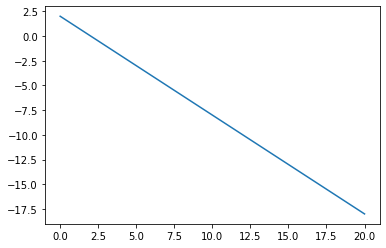

In [4]:
plt.plot(x,y)

## Adagrad

### For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion should have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion should return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
#### Try different values of the huperparameters and see the differnce in your results.

![image.png](attachment:image.png)

In [48]:
#1- Adagrad GD
def cost(t0,t1,x,y):
    error = []
    error = (-y+(t0+t1*x))**2
    return (sum(error)/(2*len(x)))

def difft0(t0,t1,x,y):
    error = []
    error = (-y+(t0+t1*x))
    return sum(error)/len(x)

def difft1(t0,t1,x,y):
    error = []
    error = (-y+(t0+t1*x))*x
    return sum(error)/len(x)
def Adagrad(theta0,theta1,x,y,alpha,epoch):
  x_points = x
  y_points = y

  theta0D = [theta0]
  theta1D = [theta1]
  lossD = []
  e = 10**-8
  alpha = 0.15
  vt0 = 0
  vt1 = 0
  yhat = x_points*theta1+theta0
  hyp = [yhat]
  for i in range(epoch):
      j = cost(theta0,theta1,x_points,y_points)
      lossD.append(j)
      #print(j)
      dt0 = difft0(theta0,theta1,x_points,y_points)
      dt1 = difft1(theta0,theta1,x_points,y_points)
      vt0 = vt0 + (dt0)**2
      vt1 = vt1 + (dt1)**2
      theta0 = theta0 - alpha*dt0/(vt0**(0.5)+e)
      theta1 = theta1 - alpha*dt1/(vt1**(0.5)+e)
      theta0D.append(theta0)
      theta1D.append(theta1)
      yhat = x_points*theta1+theta0
      hyp.append(yhat)
  lossD.append(cost(theta0,theta1,x_points,y_points))    
  print(theta0,theta1,"\nAdagrad Cost: \t",j)
  return theta0D,theta1D,lossD,hyp,theta0,theta1

In [49]:
def test(theta0,theta1,x,y,alpha,epoch):
    t0,t1,loss,hyp,th0,th1 = (Adagrad(theta0,theta1,x,y,alpha,epoch))

    print("Loss")
    plt.plot(range(len(loss)),loss)
    plt.xlabel('iteration')
    plt.ylabel('Loss')
    plt.show()

    print("Theta 0")
    plt.plot(t0, loss)
    plt.xlabel('Theta 0')
    plt.ylabel('Loss')
    plt.show()

    print("Theta 1")
    plt.plot(t1, loss)
    plt.xlabel('Theta 1')
    plt.ylabel('Loss')
    plt.show()

    print("all regression lines till converge")
    plt.scatter(x,y)
    for i in range(len(t0)):
        yhatt = t0[i]+t1[i]*x
        plt.plot(x,yhatt)
    plt.show()

    print("best regression line")
    yhat = x*th1+th0
    plt.plot(x,yhat)
    plt.scatter(x,y)
    plt.show()

-0.25470730793126634 -0.8280423669550446 
Adagrad Cost: 	 0.6591909741214407
Loss


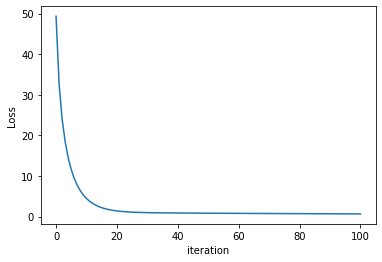

Theta 0


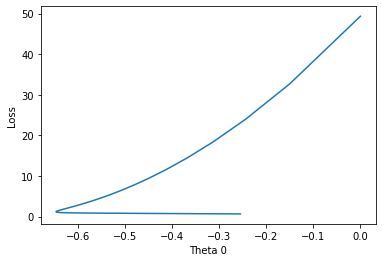

Theta 1


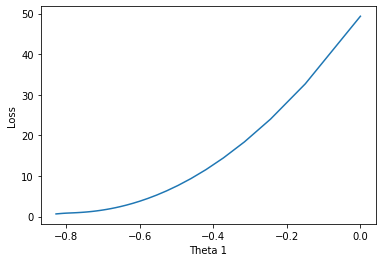

all regression lines till converge


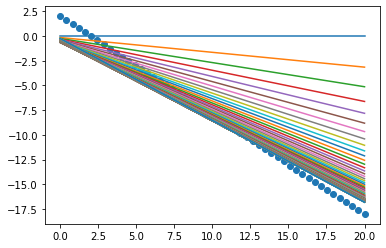

best regression line


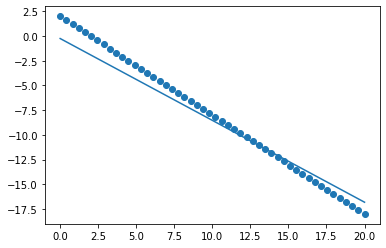

In [52]:
test(0,0,x,y,0.1,100)

## RMSProp

### Update the previos implementation to be RMSProp.
#### Compare your results with Adagrad results.

![image.png](attachment:image.png)

In [58]:
#2- RMS GD
def cost(t0,t1,x,y):
    error = []
    error = (-y+(t0+t1*x))**2
    return (sum(error)/(2*len(x)))

def difft0(t0,t1,x,y):
    error = []
    error = (-y+(t0+t1*x))
    return sum(error)/len(x)

def difft1(t0,t1,x,y):
    error = []
    error = (-y+(t0+t1*x))*x
    return sum(error)/len(x)
def RMS(theta0,theta1,x,y,alpha,epoch,beta):
  x_points = x
  y_points = y

  theta0D = [theta0]
  theta1D = [theta1]
  lossD = []
  e = 10**-8
  alpha = 0.15
  vt0 = 0
  vt1 = 0
  yhat = x_points*theta1+theta0
  hyp = [yhat]
  for i in range(epoch):
      j = cost(theta0,theta1,x_points,y_points)
      lossD.append(j)
      #print(j)
      dt0 = difft0(theta0,theta1,x_points,y_points)
      dt1 = difft1(theta0,theta1,x_points,y_points)
      vt0 = beta*vt0 + (1-beta)*(dt0)**2
      vt1 = beta*vt1 + (1-beta)*(dt1)**2
      theta0 = theta0 - alpha*dt0/(vt0**(0.5)+e)
      theta1 = theta1 - alpha*dt1/(vt1**(0.5)+e)
      theta0D.append(theta0)
      theta1D.append(theta1)
      yhat = x_points*theta1+theta0
      hyp.append(yhat)
  lossD.append(cost(theta0,theta1,x_points,y_points))    
  print(theta0,theta1,"\nRMS Cost: \t",j)
  return theta0D,theta1D,lossD,hyp,theta0,theta1

In [59]:
def test(theta0,theta1,x,y,alpha,epoch,beta):
    t0,t1,loss,hyp,th0,th1 = (RMS(theta0,theta1,x,y,alpha,epoch,beta))

    print("Loss")
    plt.plot(range(len(loss)),loss)
    plt.xlabel('iteration')
    plt.ylabel('Loss')
    plt.show()

    print("Theta 0")
    plt.plot(t0, loss)
    plt.xlabel('Theta 0')
    plt.ylabel('Loss')
    plt.show()

    print("Theta 1")
    plt.plot(t1, loss)
    plt.xlabel('Theta 1')
    plt.ylabel('Loss')
    plt.show()

    print("all regression lines till converge")
    plt.scatter(x,y)
    for i in range(len(t0)):
        yhatt = t0[i]+t1[i]*x
        plt.plot(x,yhatt)
    plt.show()

    print("best regression line")
    yhat = x*th1+th0
    plt.plot(x,yhat)
    plt.scatter(x,y)
    plt.show()

1.8545801265787631 -1.069644824579391 
RMS Cost: 	 0.4385590832254823
Loss


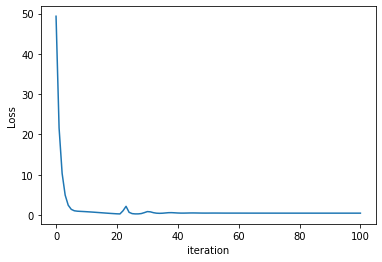

Theta 0


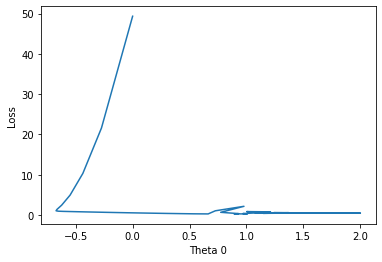

Theta 1


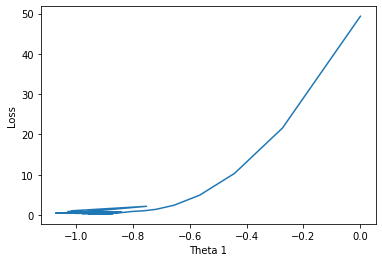

all regression lines till converge


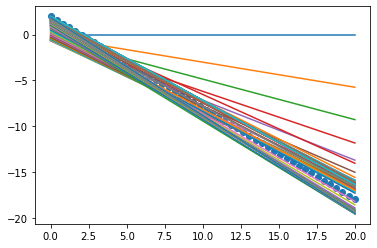

best regression line


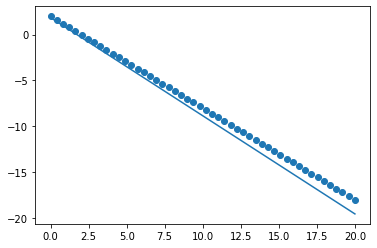

In [61]:
test(0,0,x,y,0.1,100,0.7)

## Adam

### Update the previos implementation to be Adam.
#### Compare your results with Adagrad and RMSProp results.

![image-4.png](attachment:image-4.png)

In [91]:
#2- RMS GD
def cost(t0,t1,x,y):
    error = []
    error = (-y+(t0+t1*x))**2
    return (sum(error)/(2*len(x)))

def difft0(t0,t1,x,y):
    error = []
    error = (-y+(t0+t1*x))
    return sum(error)/len(x)

def difft1(t0,t1,x,y):
    error = []
    error = (-y+(t0+t1*x))*x
    return sum(error)/len(x)
def ADAM(theta0,theta1,x,y,alpha,epoch,beta1,beta2):
  x_points = x
  y_points = y

  theta0D = [theta0]
  theta1D = [theta1]
  lossD = []
  e = 10**-8
  ep = 10**-8
  alpha = 0.15
  vt0 = 0
  vt1 = 0
  mt0 =0
  mt1 = 0
  yhat = x_points*theta1+theta0
  hyp = [yhat]
  for i in range(epoch):
      j = cost(theta0,theta1,x_points,y_points)
      lossD.append(j)
      #print(j)
      dt0 = difft0(theta0,theta1,x_points,y_points)
      dt1 = difft1(theta0,theta1,x_points,y_points)
      #--
      mt0 = beta1*mt0 + (1-beta1)*(dt0)
      mt1 = beta1*mt1 + (1-beta1)*(dt1)
      vt0 = beta2*vt0 + (1-beta2)*(dt0**2)
      vt1 = beta2*vt1 + (1-beta2)*(dt1**2)
      
      mt0x = mt0/(1-(beta1**(i+1)))
      mt1x = mt1/(1-(beta1**(i+1)))
      vt0x = vt0/(1-(beta2**(i+1)))
      vt1x = vt1/(1-(beta2**(i+1)))
    
      theta0 = theta0 - alpha*mt0x/((vt0x**(0.5))+ep)
      theta1 = theta1 - alpha*mt1x/((vt1x**(0.5))+ep)
      #--
      theta0D.append(theta0)
      theta1D.append(theta1)
      yhat = x_points*theta1+theta0
      hyp.append(yhat)
  lossD.append(cost(theta0,theta1,x_points,y_points))    
  print(theta0,theta1,"\nRMS Cost: \t",j)
  return theta0D,theta1D,lossD,hyp,theta0,theta1

In [92]:
def test(theta0,theta1,x,y,alpha,epoch,beta1,beta2):
    t0,t1,loss,hyp,th0,th1 = (ADAM(theta0,theta1,x,y,alpha,epoch,beta1,beta2))

    print("Loss")
    plt.plot(range(len(loss)),loss)
    plt.xlabel('iteration')
    plt.ylabel('Loss')
    plt.show()

    print("Theta 0")
    plt.plot(t0, loss)
    plt.xlabel('Theta 0')
    plt.ylabel('Loss')
    plt.show()

    print("Theta 1")
    plt.plot(t1, loss)
    plt.xlabel('Theta 1')
    plt.ylabel('Loss')
    plt.show()

    print("all regression lines till converge")
    plt.scatter(x,y)
    for i in range(len(t0)):
        yhatt = t0[i]+t1[i]*x
        plt.plot(x,yhatt)
    plt.show()

    print("best regression line")
    yhat = x*th1+th0
    plt.plot(x,yhat)
    plt.scatter(x,y)
    plt.show()

1.9818180268824288 -1.0181808983665315 
RMS Cost: 	 0.010387623509620844
Loss


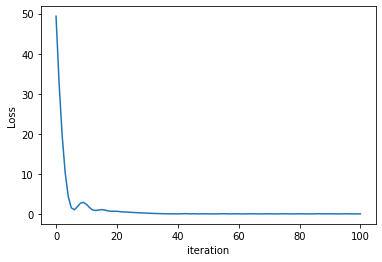

Theta 0


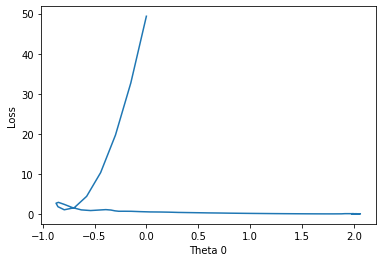

Theta 1


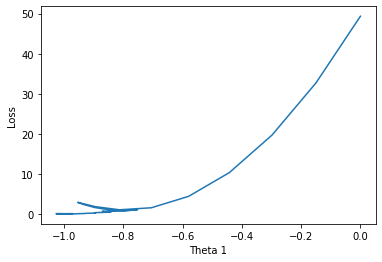

all regression lines till converge


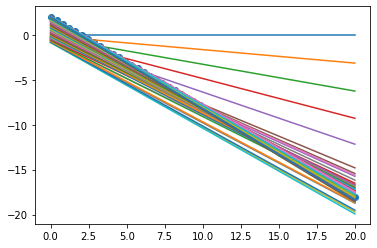

best regression line


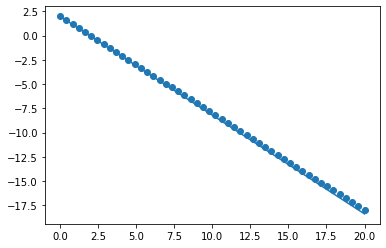

In [93]:
test(0,0,x,y,0.01,100,0.7,0.8)

## Congratulations 
![image.png](attachment:image.png)